In [ ]:
!pip install -q -U kaggle_environments

In [ ]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate
from kaggle_environments.envs.rps.utils import get_score

Опишем поведение агента, всегда играющего "камень", это значение 0

In [ ]:
def rock (observation, configuration):
    return 0

Опишем поведение агента, всегда играющего "бумагу" - это значение 1

In [ ]:
def paper(observation, configuration):
    return 1

Опишем поведение агента, всегда играющего "ножницы" - это значение 2

In [ ]:
def scissors(observation, configuration):
    return 2

Опишем поведение агента, всегда играющего рандомно.

In [ ]:
import random

def random_agent(observation, configuration):
    return random.randrange(random.randrange(0,2), configuration.signs)

Попробуем теперь использовать информацию о прошлых действиях противника. Опишем агента, который производит то же самое действие, что и оппонент на прошлом ходу

In [ ]:
import random

def copy_opponent(observation, configuration):
    #in case we have information about opponent last move
    if observation.step > 0:
        return observation.lastOpponentAction
    #initial step
    else:
        return random.randrange(0, configuration.signs)

Опишем поведение агента, который в зависимости от прошлого действия оппонента, следующим ходом дает выигрышный ответ на прошлое действие соперника.

In [ ]:
import random
last_react_action = None

def reactionary (observation, configuration):
    global last_react_action
    if observation.step  == 0:
        last_react_action = random.randrange(0, configuration.signs)
    elif get_score(last_react_action, observation.lastOpponentAction) <= 1:
        (observation.lastOpponentAction + 1) % configuration.signs

    return last_react_action

In [ ]:
import random
last_counter_action = None

def counter_reactionary(observation, configuration):
    global last_counter_action
    if observation.step == 0:
        last_counter_action = random.randrange(0, configuration.signs)
    elif get_score(last_counter_action, observation.lastOpponentAction) == 1:
        last_counter_action = (last_counter_action + 2) % configuration.signs
    else:
        last_counter_action = (observation.lastOpponentAction + 1) % configuration.signs

    return last_counter_action

In [ ]:
import rndom
action_histogram = {}

def statistical(observation, configuration):
    global action_histogram
    if observation.step == 0:
        action_histogram = {}
        return
    action = observation.lastOpponentAction
    if action not in action_histogram:
        action_histogram[action] = 0
    action_histogram[action] += 1
    mode_action = None
    mode_action_count = None
    for k, v in action_histogram.items():
        if mode_action_count is None or v > mode_action_count:
            mode_action = k
            mode_action_count = v
            continue

    return (mode_action + 1) % configuration.signs

Опишем поведение агента, который производит +1 действие к тому, что использовал оппонент на прошлом ходу


In [ ]:
import random 

def copy_opponent_plus (observation, configuration):
    if observation.step > 0:
        return (observation.lastOpponentAction + 1) % configuration.signs
    else:
        return random.randrange(0, configuration.signs)


Опишем поведение агента, который производит -1 действие к тому, что использовал опонент на прошлом ходу.

In [ ]:
import random

def copy_opponent_minus (observation, configuration):
    if observation.step > 0:
        return (observation.lastOpponentAction + 2) % configuration.signs
    else:
        return random.randrange(0, configuration.signs)

In [ ]:
agents  = [rock, paper, scissors, copy_opponent, reactionary, counter_reactionary, statistical, random_agent, copy_opponent_plus, copy_opponent_minus]

In [ ]:
agents_copy = agents.copy()

In [ ]:
resalts = []

for i in agents:
  for j in agents_copy:
    resalts.append (evaluate("rps", [i, j], configuration={"episodeSteps": 100}))
    
resalts = [x for y in resalts for x in y]

In [ ]:
for i in resalts:
  del i[0]

In [ ]:
resalts = [x for y in resalts for x in y]

In [ ]:
dictionary = {'rock': resalts[:10],
     'paper': resalts[10:20],
     'scissors': resalts[20:30],
     'copy_opponent': resalts[30:40],
     'reactionary': resalts[40:50],
     'counter_reactionary': resalts[50:60],
     'statistical': resalts[60:70],
     'random_agent': resalts[70:80],
     'copy_opponent_plus': resalts [80:90],
     'copy_opponent_minus': resalts [90:100]
    }

df = pd.DataFrame(dictionary, index = dictionary.keys())

In [ ]:
 display (df)

,rock,paper,scissors,copy_opponent,reactionary,counter_reactionary,statistical,random_agent,copy_opponent_plus,copy_opponent_minus
rock,0.0,-99.0,99.0,0.0,99.0,-50.0,-98.0,0.0,-99.0,99.0
paper,99.0,0.0,-99.0,0.0,0.0,-50.0,-97.0,-25.0,-97.0,99.0
scissors,-99.0,99.0,0.0,0.0,99.0,-48.0,-99.0,0.0,-99.0,98.0
copy_opponent,0.0,0.0,0.0,0.0,0.0,96.0,-21.0,0.0,-49.0,49.0
reactionary,-99.0,99.0,0.0,0.0,0.0,-49.0,-99.0,0.0,-97.0,97.0
counter_reactionary,48.0,48.0,50.0,-99.0,48.0,0.0,0.0,0.0,99.0,-48.0
statistical,98.0,97.0,99.0,22.0,99.0,0.0,0.0,0.0,-59.0,96.0
random_agent,0.0,34.0,-23.0,0.0,-24.0,0.0,0.0,0.0,0.0,0.0
copy_opponent_plus,97.0,97.0,98.0,49.0,99.0,0.0,49.0,22.0,0.0,99.0
copy_opponent_minus,-97.0,-97.0,-98.0,-50.0,-99.0,50.0,-96.0,0.0,49.0,0.0


Красный - победа.
Синий - проигрыш. 
Результат оцениваем опираясь на таблицу построчно.

rock - 0 побед, 99 проигрышей, 99 побед, 0 побед, 99 побед, 50 проигрышей, 98 проигрышей, 0 побед.


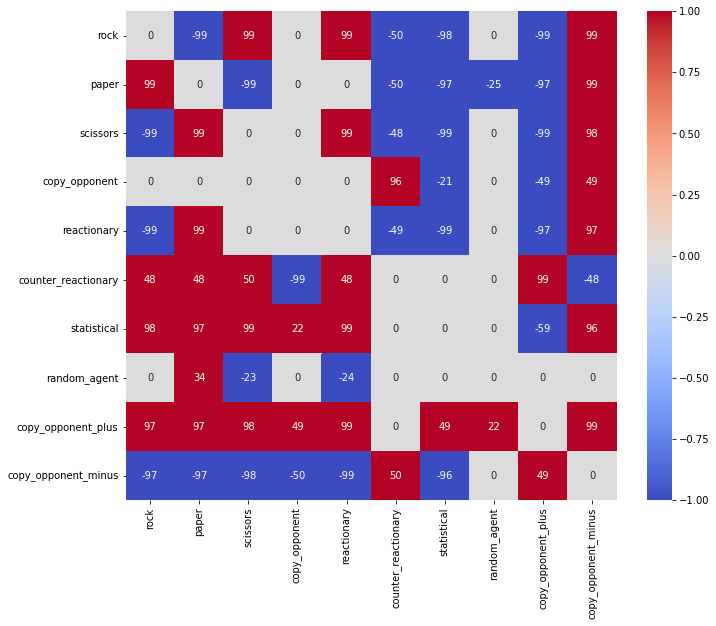

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

На удивление победил copy_opponent_plus
